In [6]:
import os
import json
import numpy as np
import random
cwd = os.path.join("C:\\","Users","qpatole","Programming","WingDataFiles","bee","wings","WingIndexFiles")

# Gula italienska - Apis Mellifera Ligustica
# Gråa krainerbin - Apis Mellifera Canica
# Mörka nordiska bin - Apis Mellifera Mellifera
# Bakfast - Blanding???

def isApisMelliferaMellifera(Ci, Dv):
    if Dv < 0 and Ci < 1.9:
        return 1
    return 0

def train_test_split_by_category(x, y, test_size=0.2):
    print("x shape " + str(x.shape))
    print("y shape " + str(y.shape))
    
    #Devide by category
    byCategory = []
    train = np.empty([0,3])
    test = np.empty([0,3])
    #print ("Len data       " + str(len(x)))
    for i in range(0,2):
        data = np.column_stack((x,y))
        byCategory.append(data[data[:,2]==i])
        np.random.shuffle(byCategory[i])
        #print ("Len category " + str(i) + " " + str(len(byCategory[i])))
        split_pos = int(len(byCategory[i])*(test_size))
        #print ("Split pos " + str(split_pos))
        train = np.vstack((train, byCategory[i][split_pos:]))
        test = np.vstack((test, byCategory[i][:split_pos]))
            
        #print("Train shape: " + str(train.shape))
        #print("Test shape: " + str(test.shape))
    return (train[:,0:2], train[:,[2]], test[:,0:2], test[:,[2]])    

def load_DvCi_data(path):
    x_train = []
    y_train = []
    for file in os.listdir(path):
        if not ".json" in file:
            continue
        with open(os.path.join(cwd,file)) as json_file:  
            data = json.load(json_file)
            for wings in data["wings"]:
                if (not isApisMelliferaMellifera(wings["Ci"], wings["Dv"])):
                    print(json_file)
                    print (wings["image"] + ", Dv: " + str(wings["Dv"]) + ", Ci: " + str(wings["Ci"]) + ", isApisMelliferaMellifera " + str(isApisMelliferaMellifera(wings["Ci"], wings["Dv"])))
                x_train.append([wings["Dv"], wings["Ci"]])
                y_train.append(isApisMelliferaMellifera(wings["Ci"], wings["Dv"]))
    return train_test_split_by_category(np.array(x_train), np.array(y_train))

(x_train, y_train, x_test, y_test) = load_DvCi_data(cwd)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

<_io.TextIOWrapper name='C:\\Users\\qpatole\\Programming\\WingDataFiles\\bee\\wings\\WingIndexFiles\\bee-wing-aby-acb-1717-x.json' mode='r' encoding='cp1252'>
bee-wing-aby-acb-1717-8.jpg, Dv: 0.014, Ci: 1.306, isApisMelliferaMellifera 0
<_io.TextIOWrapper name='C:\\Users\\qpatole\\Programming\\WingDataFiles\\bee\\wings\\WingIndexFiles\\bee-wing-aby-acb-1779-x.json' mode='r' encoding='cp1252'>
bee-wing-aby-acb-1779-7.jpg, Dv: 1.358, Ci: 1.15, isApisMelliferaMellifera 0
<_io.TextIOWrapper name='C:\\Users\\qpatole\\Programming\\WingDataFiles\\bee\\wings\\WingIndexFiles\\bee-wing-AK-09G1-x.json' mode='r' encoding='cp1252'>
bee-wing-AK-09G1-1.jpg, Dv: -0.386, Ci: 3.577, isApisMelliferaMellifera 0
<_io.TextIOWrapper name='C:\\Users\\qpatole\\Programming\\WingDataFiles\\bee\\wings\\WingIndexFiles\\bee-wing-AK-3-x.json' mode='r' encoding='cp1252'>
bee-wing-AK-3-1.jpg, Dv: -5.405, Ci: 3.453, isApisMelliferaMellifera 0
<_io.TextIOWrapper name='C:\\Users\\qpatole\\Programming\\WingDataFiles\\bee\

In [22]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    for i in range(n_labels):
        if labels[i] == 0:
            one_hot_encode[i][0] = 1
        else:
            one_hot_encode[i][1] = 1
    return one_hot_encode

Dim: 2
epoch: 0 - cost 0.8065, mse 0.1754, train accuracy 0.0773
epoch: 1 - cost 0.6375, mse 0.1238, train accuracy 0.9303
epoch: 2 - cost 0.5304, mse 0.1306, train accuracy 0.9759
epoch: 3 - cost 0.4521, mse 0.1646, train accuracy 0.9886
epoch: 4 - cost 0.3940, mse 0.2143, train accuracy 0.9949
epoch: 5 - cost 0.3499, mse 0.2724, train accuracy 0.9937
epoch: 6 - cost 0.3157, mse 0.3345, train accuracy 0.9899
epoch: 7 - cost 0.2886, mse 0.3979, train accuracy 0.9886
epoch: 8 - cost 0.2666, mse 0.4612, train accuracy 0.9873
epoch: 9 - cost 0.2484, mse 0.5233, train accuracy 0.9873
epoch: 10 - cost 0.2330, mse 0.5838, train accuracy 0.9861
epoch: 11 - cost 0.2197, mse 0.6425, train accuracy 0.9848
epoch: 12 - cost 0.2082, mse 0.6993, train accuracy 0.9848
epoch: 13 - cost 0.1980, mse 0.7543, train accuracy 0.9848
epoch: 14 - cost 0.1888, mse 0.8076, train accuracy 0.9848
epoch: 15 - cost 0.1806, mse 0.8592, train accuracy 0.9848
epoch: 16 - cost 0.1731, mse 0.9092, train accuracy 0.9848


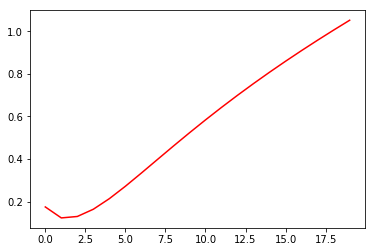

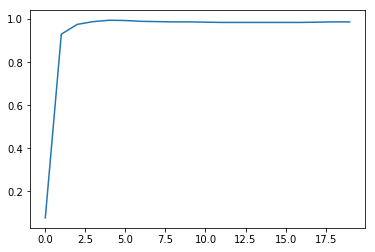

Test Accuracy:  0.98477155
MSE: 1.0515


In [24]:
import os
learning_rate = 0.3
training_epochs = 20
cost_history = np.empty(shape=[1], dtype=float)
n_dim = x_train[0].shape[0]
print("Dim: " + str(n_dim))
n_class = 2

model_path = os.path.join("C:\\","Users","qpatole","Programming", "Model")

n_hidden_1 = 5
n_hidden_2 = 5
n_hidden_3 = 5
n_hidden_4 = 5

x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

def multilayer_perceptron(x, weights, biases):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
#    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
#    layer_2 = tf.nn.sigmoid(layer_2)

#    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
#    layer_3 = tf.nn.sigmoid(layer_3)
    
    layer_4 = tf.add(tf.matmul(layer_1, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

weights = {
    'h1' : tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2' : tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3' : tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4' : tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out' : tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))    
}

biases = {
    'b1' : tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2' : tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3' : tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4' : tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out' : tf.Variable(tf.truncated_normal([n_class]))    
}

init = tf.global_variables_initializer()
saver = tf.train.Saver()

y = multilayer_perceptron(x, weights, biases)
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

mse_history = []
accuracy_history = []

Y = one_hot_encode(y_train)
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: x_train, y_: Y})
    cost = sess.run(cost_function, feed_dict={x: x_train, y_: Y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    pred_y = sess.run(y, feed_dict={x: x_test})
    mse = tf.reduce_mean(tf.square(pred_y - y_test))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: x_train, y_: Y}))
    accuracy_history.append(accuracy)
    print('epoch: %d - cost %.4f, mse %.4f, train accuracy %.4f' % (epoch, cost, mse_, accuracy))
    
save_path = saver.save(sess, model_path)
print("Model saved in file: %s" % save_path)

plt.plot(mse_history, 'r')
plt.show()
plt.plot(accuracy_history)
plt.show()

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: x_test, y_: one_hot_encode(y_test)})))

pred_y = sess.run(y, feed_dict={x: x_test})
mse = tf.reduce_mean(tf.square(pred_y - y_test))
print("MSE: %.4f" % sess.run(mse))